<a href="https://colab.research.google.com/github/MuhammadBasilKhan/chair-image-detection/blob/main/chair_vgg16_modelrgb%20color%20detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import tensorflow as tf




In [3]:
categories=['Comedor','Gamer','Mesedoras','Taburete','Terraza']


In [4]:
dir='/content/drive/MyDrive/drive/chair data/training'

In [5]:
import cv2

In [6]:
imgsize=224
data=[]
for category in categories:
  folder=os.path.join(dir,category)
  label=categories.index(category)
  for img in os.listdir(folder):
    img_path=os.path.join(folder,img)
    img_arr=cv2.imread(img_path)
    img_arr=cv2.resize(img_arr,(imgsize,imgsize))
    data.append([img_arr,label])

In [7]:
len(data)

2500

In [8]:
import random

In [9]:
random.shuffle(data)

In [10]:
x=[]
y=[]
for features,label in data:
  x.append(features)
  y.append(label)
  len(x)
  len(y)

In [11]:
import numpy as np

In [12]:
X=np.array(x)
Y=np.array(y)

In [13]:
X.shape

(2500, 224, 224, 3)

In [14]:
Y.shape

(2500,)

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.

In [17]:
X_train.shape

(2000, 224, 224, 3)

In [18]:
X_test.shape

(500, 224, 224, 3)

In [19]:
from keras.applications.vgg16 import VGG16
vgg=VGG16()

553467096/553467096 [==============================] - 11s 0us/step


In [20]:
vgg = VGG16(include_top=False, input_shape=(imgsize, imgsize, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [21]:
from keras import Sequential
model=Sequential()


In [22]:
from keras.layers import Dense
from keras.layers import Dense, Flatten

In [23]:
for layer in vgg.layers:
    model.add(layer)

In [24]:
model.add(Flatten())
model.add(Dense(len(categories),activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [26]:
for layer in model.layers[:-2]:  # Exclude the newly added dense layer
    layer.trainable = False

In [27]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
model.fit(X_train,Y_train,epochs=10,validation_data=(X_test,Y_test))

Epoch 1/10
63/63 [==============================] - 28s 298ms/step - loss: 0.3374 - accuracy: 0.8765 - val_loss: 0.2363 - val_accuracy: 0.9040
Epoch 2/10
63/63 [==============================] - 10s 158ms/step - loss: 0.0639 - accuracy: 0.9800 - val_loss: 0.1697 - val_accuracy: 0.9440
Epoch 3/10
63/63 [==============================] - 10s 157ms/step - loss: 0.0290 - accuracy: 0.9920 - val_loss: 0.1201 - val_accuracy: 0.9540
Epoch 4/10
63/63 [==============================] - 9s 147ms/step - loss: 0.0159 - accuracy: 0.9990 - val_loss: 0.1199 - val_accuracy: 0.9540
Epoch 5/10
63/63 [==============================] - 10s 159ms/step - loss: 0.0117 - accuracy: 0.9995 - val_loss: 0.1176 - val_accuracy: 0.9540
Epoch 6/10
63/63 [==============================] - 10s 159ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.1036 - val_accuracy: 0.9680
Epoch 7/10
63/63 [==============================] - 10s 159ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.1030 - val_accuracy: 0.9660


In [29]:
model.evaluate(X_test,Y_test)

16/16 [==============================] - 2s 116ms/step - loss: 0.1044 - accuracy: 0.9560


[0.10440903902053833, 0.9559999704360962]

In [30]:
model.save('chairvgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
import cv2
import numpy as np

# Define the categories
categories = ['Comedor', 'Gamer', 'Mesedoras', 'Taburete', 'Terraza']

# Load the trained model (assuming it's already trained as per the previous code)
# If you saved the model, load it using the following lines:
# from keras.models import load_model
# model = load_model('path_to_your_model.h5')

def preprocess_image(image_path, imgsize=224):
    """Preprocess the image to the required input shape for the model."""
    img_arr = cv2.imread(image_path)
    img_arr = cv2.resize(img_arr, (imgsize, imgsize))
    img_arr = img_arr / 255.0  # Normalize the image
    img_arr = np.expand_dims(img_arr, axis=0)  # Expand dimensions to match the model input
    return img_arr

def predict_category(image_path, model, categories):
    """Predict the category of the image."""
    img_arr = preprocess_image(image_path)
    prediction = model.predict(img_arr)
    predicted_index = np.argmax(prediction, axis=1)[0]
    return categories[predicted_index]

# Example usage:
image_path = '/content/drive/MyDrive/drive/chair data/training/Mesedoras/1645818166920.jpeg'  # Replace with the path to your image
predicted_category = predict_category(image_path, model, categories)
print(f"The predicted category is: {predicted_category}")


1/1 [==============================] - 0s 27ms/step
The predicted category is: Mesedoras


1/1 [==============================] - 0s 28ms/step


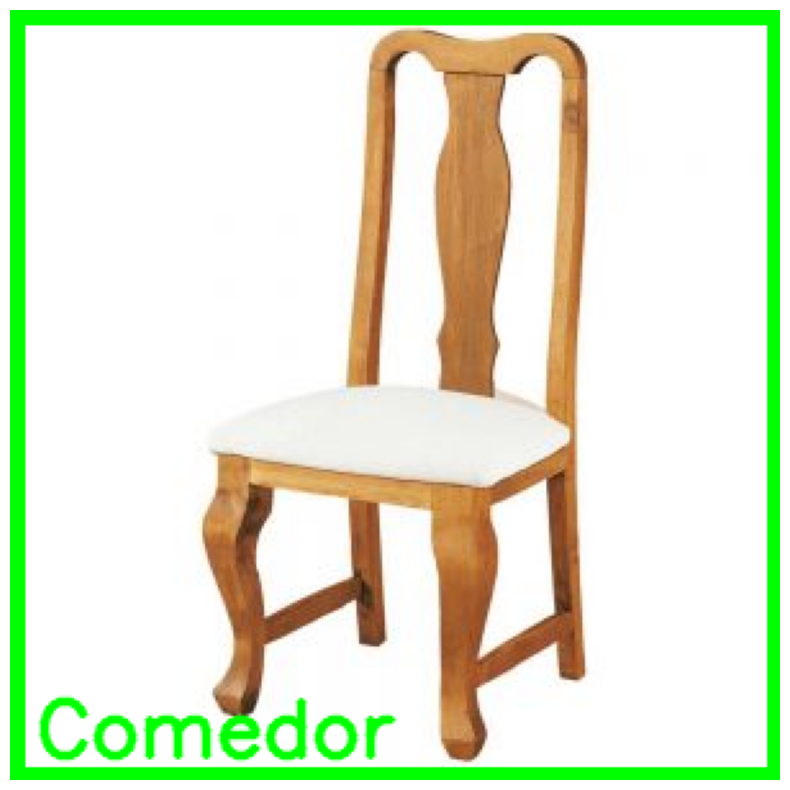

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the categories
categories = ['Comedor', 'Gamer', 'Mesedoras', 'Taburete', 'Terraza']

# Load the trained model (assuming it's already trained as per the previous code)
# If you saved the model, load it using the following lines:
# from keras.models import load_model
# model = load_model('path_to_your_model.h5')

def preprocess_image(image_path, imgsize=224):
    """Preprocess the image to the required input shape for the model."""
    img_arr = cv2.imread(image_path)
    img_arr = cv2.resize(img_arr, (imgsize, imgsize))
    img_arr = img_arr / 255.0  # Normalize the image
    img_arr = np.expand_dims(img_arr, axis=0)  # Expand dimensions to match the model input
    return img_arr

def predict_category(image_path, model, categories):
    """Predict the category of the image."""
    img_arr = preprocess_image(image_path)
    prediction = model.predict(img_arr)
    predicted_index = np.argmax(prediction, axis=1)[0]
    return categories[predicted_index]

def draw_rectangle(image_path, predicted_category):
    """Draw a rectangle around the image and display the predicted category."""
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Draw a rectangle around the image
    cv2.rectangle(img, (0, 0), (width, height), (0, 255, 0), 10)

    # Put the predicted category text on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, predicted_category, (10, height - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the image with rectangle and category
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage:
image_path = '/content/drive/MyDrive/drive/chair data/testing/Comedor/13101-300x300.jpg'  # Replace with the path to your image
predicted_category = predict_category(image_path, model, categories)
draw_rectangle(image_path, predicted_category)


1/1 [==============================] - 0s 69ms/step


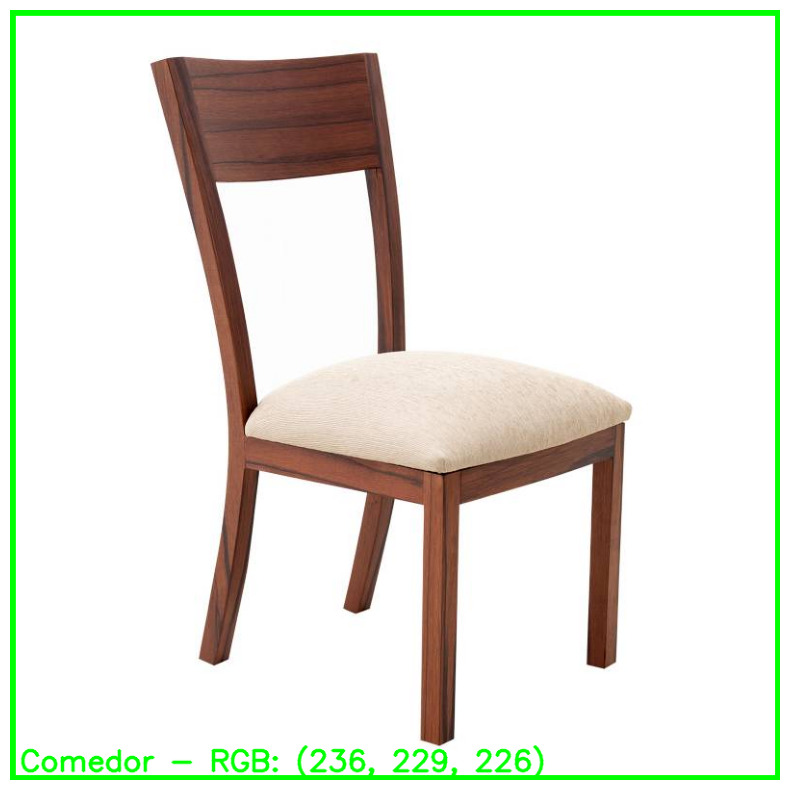

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the categories
categories = ['Comedor', 'Gamer', 'Mesedoras', 'Taburete', 'Terraza']

# Load the trained model (assuming it's already trained as per the previous code)
# If you saved the model, load it using the following lines:
# from keras.models import load_model
# model = load_model('path_to_your_model.h5')

def preprocess_image(image_path, imgsize=224):
    """Preprocess the image to the required input shape for the model."""
    img_arr = cv2.imread(image_path)
    img_arr = cv2.resize(img_arr, (imgsize, imgsize))
    img_arr = img_arr / 255.0  # Normalize the image
    img_arr = np.expand_dims(img_arr, axis=0)  # Expand dimensions to match the model input
    return img_arr

def predict_category(image_path, model, categories):
    """Predict the category of the image."""
    img_arr = preprocess_image(image_path)
    prediction = model.predict(img_arr)
    predicted_index = np.argmax(prediction, axis=1)[0]
    return categories[predicted_index]

def get_dominant_color(image):
    """Get the dominant color of the image."""
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.reshape((img.shape[0] * img.shape[1], 3))
    img = np.float32(img)

    # Define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    K = 1
    _, labels, palette = cv2.kmeans(img, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    dominant_color = palette[0]

    return tuple(map(int, dominant_color))

def draw_rectangle(image_path, predicted_category):
    """Draw a rectangle around the image and display the predicted category with color name."""
    img = cv2.imread(image_path)
    height, width, _ = img.shape

    # Draw a rectangle around the image
    cv2.rectangle(img, (0, 0), (width, height), (0, 255, 0), 10)

    # Get the dominant color of the image
    dominant_color = get_dominant_color(image_path)
    color_name = f'RGB: {dominant_color}'

    # Put the predicted category and color name text on the image
    font = cv2.FONT_HERSHEY_SIMPLEX
    text = f'{predicted_category} - {color_name}'
    cv2.putText(img, text, (10, height - 10), font, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Display the image with rectangle and category
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Example usage:
image_path = '/content/drive/MyDrive/drive/chair data/testing/Comedor/10183718_1.jpg'  # Replace with the path to your image
predicted_category = predict_category(image_path, model, categories)
draw_rectangle(image_path, predicted_category)
